In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Q1: 26.5 Q3: 74.5
Aggregations: max     99.000000
mean    50.479798
Name: Roll No, dtype: float64


C:\Users\Aniket\AppData\Local\Temp\ipykernel_11512\66746552.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ap3[col].fillna(ap3[col].median(), inplace=True)
C:\Users\Aniket\AppData\Local\Temp\ipykernel_11512\66746552.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

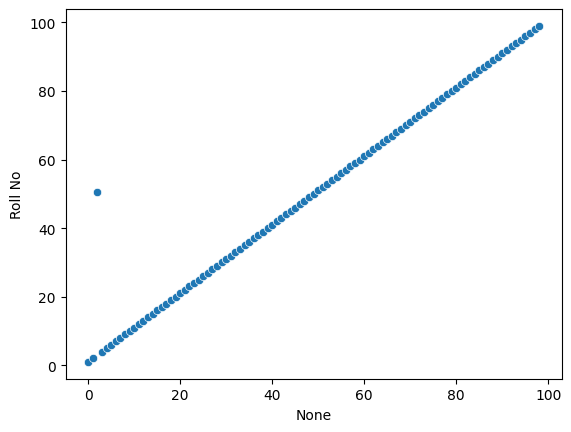

In [5]:
# 1. Load & missing via median/0
ap3 = pd.read_csv(r"C:\ThirdYear_Notes\Practicals\DSBDA\AcademicPerformance_New.csv")
for col in ap3.select_dtypes(include=np.number):
    ap3[col].fillna(ap3[col].median(), inplace=True)
ap3.fillna(0, inplace=True)

# 2. Outliers via IQR
col = ap3.select_dtypes(include=np.number).columns[0]
Q1, Q3 = ap3[col].quantile([0.25,0.75])
IQR = Q3 - Q1
ap3['outlier'] = ((ap3[col] < Q1 - 1.5*IQR) | (ap3[col] > Q3 + 1.5*IQR))

# 3. Show Q1, Q3 & remove
print("Q1:", Q1, "Q3:", Q3)
ap3_no = ap3[~ap3['outlier']]

# 4. Aggregation & reasoning
agg = ap3_no[col].agg(['max','mean'])
print("Aggregations:", agg)
# Reason: scaling via mean centers data, aiding normality

# 5. Scatter plot (index vs value)
sns.scatterplot(x=ap3_no.index, y=ap3_no[col])
plt.show()
